## What exactly is Image Classification?

Image classification involves categorizing and labeling groups of pixels or vectors within an image based on predefined criteria. These criteria may encompass one or more spectral or textural characteristics to define the categorization rules.

## Image Classification Using TensorFlow

Image classification can also be achieved using less complex models available in Scikit-Learn. However, TensorFlow offers the advantage of building neural networks specifically tailored for image classification tasks. With neural networks, we can uncover more intricate patterns beyond simple classification. Let's initiate the task of image classification with TensorFlow by importing essential packages:

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Import the Fashion MNIST dataset

Fashion MNIST serves as a direct replacement for the classic MNIST dataset, often employed as the "Hello, World" of machine learning programs in computer vision. While the MNIST dataset comprises images of handwritten digits (0, 1, 2, etc.), the Fashion MNIST dataset features images of clothing items, maintaining the same data format. This dataset offers a more advanced alternative to the traditional MNIST dataset. Now, let's import the Fashion MNIST dataset to commence our image classification task with TensorFlow:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Within the dataset, each image corresponds to a single label. However, since the class names are not predefined in the dataset, we'll need to store them here for later use when visualizing the images:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Data preprocessing

To facilitate the Image Classification task with TensorFlow, it's essential to preprocess the data before training the neural network. Upon inspecting the first sample from the training set, you'll observe that the pixel values range between 0 and 255:

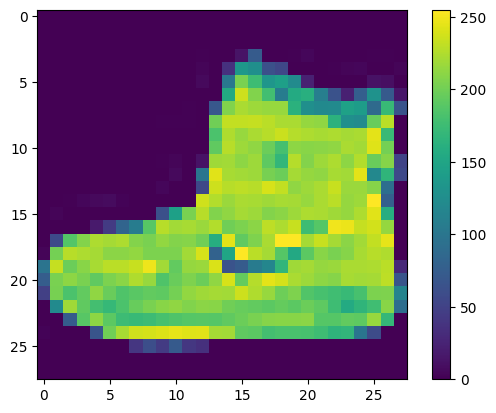

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Now, I'll scale these values to a range of 0 to 1 before feeding them into the neural network model. To accomplish this, we'll divide the values by 255. It's crucial to preprocess both the training and test sets in the same manner:

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

To ensure that the data is in the correct format and to confirm readiness for creating and training the neural network for image classification with TensorFlow, let's visualize the first 25 images from the training set. Additionally, we'll display the corresponding class name under each image:

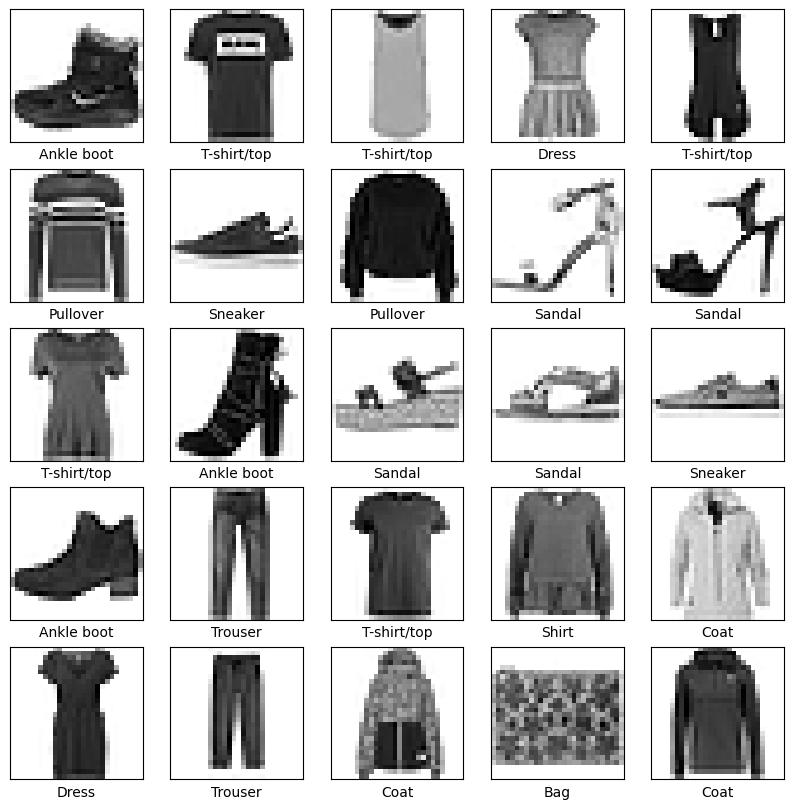

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## TensorFlow Image Classification: Constructing the Model

Constructing the Neural Network for Image Classification with TensorFlow entails configuring the model layers and subsequently compiling the model.

 ### Layer Configuration:
The fundamental component of neural networks is its layers, which operate by extracting representations from the input data. Deep learning models typically consist of interconnected layers, with each layer contributing to the overall representation learning process. Let's proceed to create the layers for our neural network:

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

### Compiling The Model

Now, let’s move forward with compiling our model:

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Image Classification with TensorFlow: Training Model

Now, it's time to train the neural network for image classification using TensorFlow and subsequently make predictions.

In [9]:
#Fitting the Model
model.fit(train_images, train_labels, epochs=10)
#Evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5037 - accuracy: 0.8228
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3755 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3370 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3101 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2937 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 2s 960us/step - loss: 0.2776 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 2s 934us/step - loss: 0.2667 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2536 - accuracy: 0.9056
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2469 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0

In [10]:
#Make Predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 0s 582us/step


array([1.5461343e-05, 1.2636020e-08, 2.8344158e-07, 3.8136903e-09,
       1.5092482e-07, 2.6123162e-04, 2.6197779e-06, 9.9801477e-03,
       2.7513894e-07, 9.8973978e-01], dtype=float32)

A prediction consists of an array of 10 numbers, each representing the "confidence" of the model regarding the image's likeness to each of the 10 different garments. Let's determine which label corresponds to the highest confidence value:

In [11]:
np.argmax(predictions[0])

9

Hence, the model is most certain that this image depicts an ankle boot, corresponding to class_names[9]. Upon inspecting the test label, we verify the correctness of this classification.

In [12]:
test_labels[0]

9

Now, I'll create a helper function to visualize our predictions:

In [13]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Verify Predictions

Let's examine the predictions and the prediction table for the 0th frame. Correct prediction labels will be displayed in blue, while incorrect prediction labels will be displayed in red:

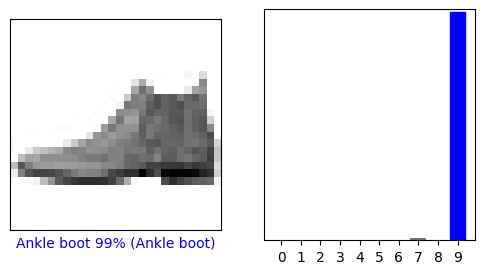

In [14]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

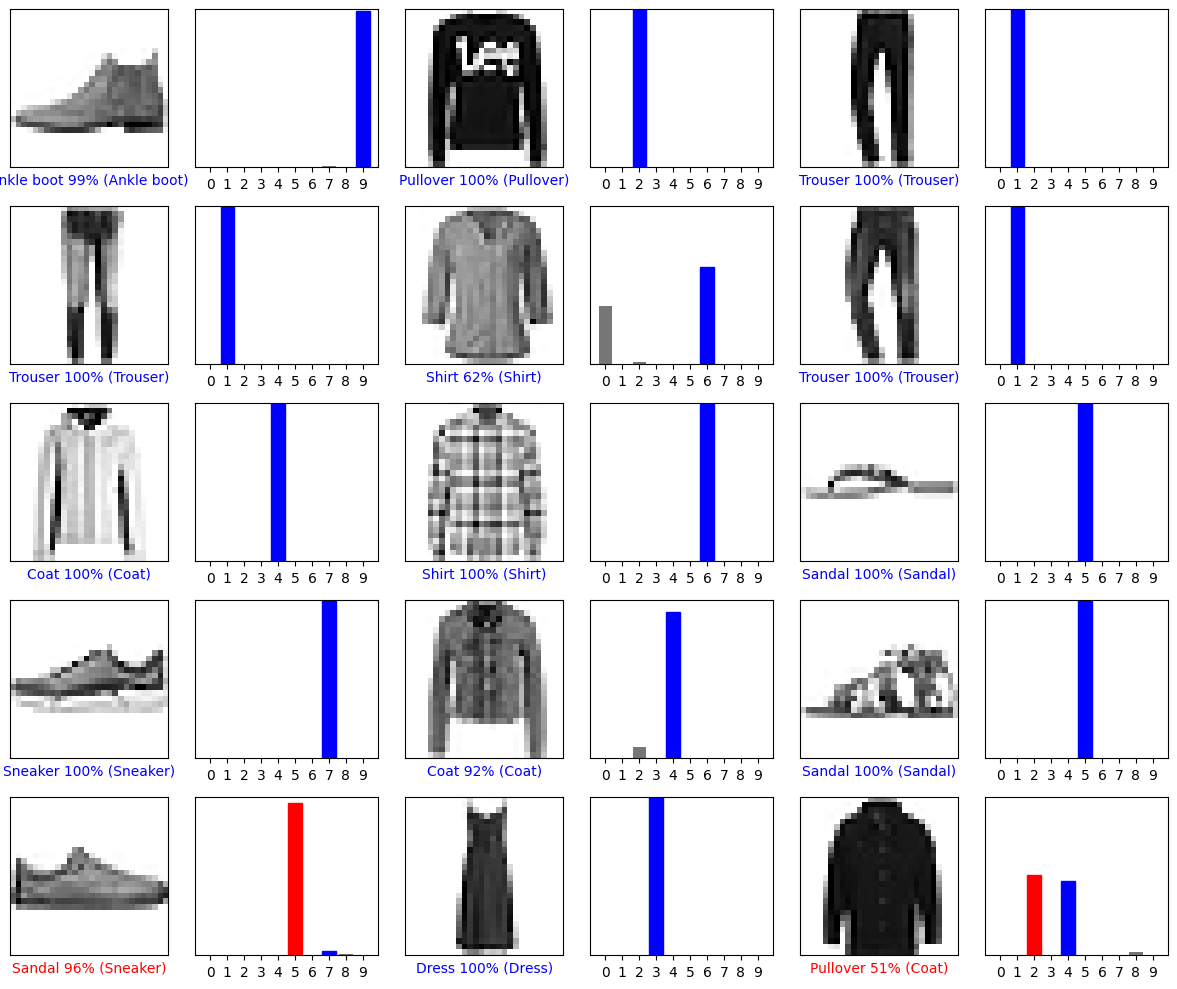

In [17]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

The output appears satisfactory, with the exception of sneaker and coat that are misclassified. I trust you found this analysis on Image Classification with Machine Learning informative and engaging.